## Finding the Optimal Parameters for Machine Learning Models
### Dr. Robert G. de Luna, PECE

## Agenda

- How to search for an **optimal tuning parameter**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?

TO CHECK THE VERSION OF LIBRARIES

In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
scipy: 1.11.1
numpy: 1.24.3
matplotlib: 3.7.2


pandas: 2.0.3
sklearn: 1.3.0


TO IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

TO LOAD THE DATASET

In [3]:
dataset = pandas.read_csv('Herbal_Plants.csv')

TO DETERMINE THE DIMENSIONS OF THE DATASET

In [4]:
print(dataset.shape)

(600, 6)


TO PEEK AT THE DATA

In [5]:
print(dataset.head(20))

    Aspect Ratio  Circularity  Convexity  Solidity  Rectangularity   Herbal
0       0.372222     0.414548   1.048038  0.986465        1.371268  Bayabas
1       0.433645     0.447313   1.045098  0.988799        1.363776  Bayabas
2       0.401473     0.443101   1.053360  0.989714        1.313005  Bayabas
3       0.375887     0.427894   1.048450  0.988571        1.333066  Bayabas
4       0.405680     0.428203   1.057887  0.987781        1.353763  Bayabas
5       0.398747     0.388079   1.110448  0.984394        1.337989  Bayabas
6       0.384966     0.368406   1.126030  0.984969        1.354246  Bayabas
7       0.383948     0.403739   1.072327  0.984015        1.365069  Bayabas
8       0.384120     0.398618   1.079316  0.979155        1.364937  Bayabas
9       0.397500     0.460066   1.000896  0.990245        1.392325  Bayabas
10      0.349057     0.383387   1.089474  0.985241        1.333390  Bayabas
11      0.349010     0.430671   1.029466  0.985642        1.329785  Bayabas
12      0.39

TO SEE THE STATISTICAL SUMMARY

In [6]:
print(dataset.describe())

       Aspect Ratio  Circularity   Convexity    Solidity  Rectangularity
count    600.000000   600.000000  600.000000  600.000000      600.000000
mean       0.662799     0.391058    1.192591    0.891880        1.699739
std        0.262202     0.161577    0.309784    0.165721        0.759142
min        0.325866     0.059155    0.994565    0.349010        1.143436
25%        0.428571     0.320607    1.018466    0.920465        1.352759
50%        0.625000     0.431172    1.050733    0.962758        1.433250
75%        0.878558     0.523812    1.163160    0.981336        1.653815
max        1.266323     0.623762    2.289787    0.991640        5.163947


TO SEE THE CLASS DISTRIBUTION

In [7]:
print(dataset.groupby('Herbal').size())

Herbal
Akapulko          50
Ampalaya          50
Balbas-pusa       50
Bayabas           50
Lagundi           50
Malunggay         50
Niyog-Niyogan     50
Oregano           50
Sambong           50
Tsaang-Gubat      50
Ulasimang-Bato    50
Yerba-Buena       50
dtype: int64


TO SHOW THE UNIVARIATE PLOT (BOX and WHISKER PLOTS)

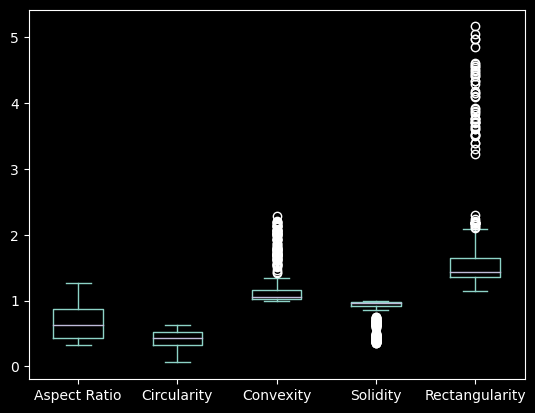

In [8]:
dataset.plot(kind='box', subplots=False, layout=(1,5), sharex=False, sharey=False)
plt.show()

##### TO SHOW THE HISTOGRAM FOR THE DISTRIBUTION

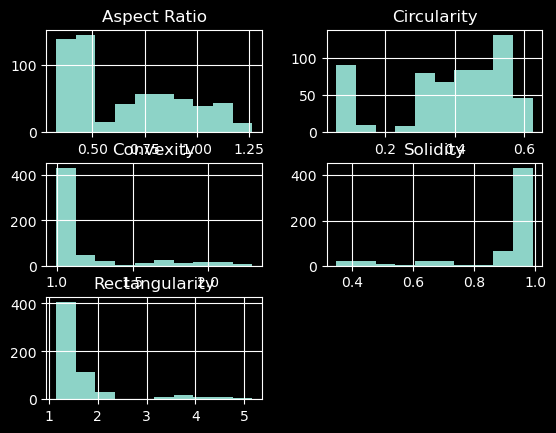

In [9]:
dataset.hist()
plt.show()

FOR THE MULTIVARIATE PLOT

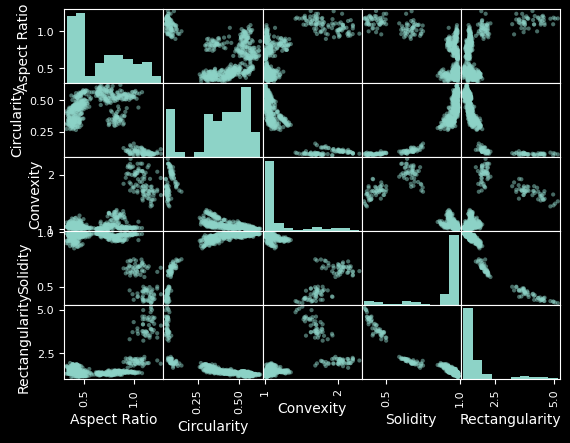

In [10]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

TO CREATE THE MATRIX OF INDEPENDENT VARIABLE, X

In [11]:
X = dataset.iloc[:, :-1].values
X

array([[0.37222222, 0.4145476 , 1.04803789, 0.98646543, 1.3712683 ],
       [0.43364486, 0.44731308, 1.04509804, 0.98879871, 1.3637762 ],
       [0.4014733 , 0.44310102, 1.05335968, 0.9897137 , 1.31300538],
       ...,
       [0.86548223, 0.33983061, 1.25306958, 0.92209603, 1.47224353],
       [0.80092593, 0.30198726, 1.31274131, 0.93084448, 1.49458549],
       [0.85037407, 0.31418971, 1.28234501, 0.91956451, 1.51021603]])

TO CREATE THE MATRIX OF DEPENDENT VARIABLE, Y

In [12]:
Y = dataset.iloc[:, 5].values
Y

array(['Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas',
       'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas',
       'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas', 'Bayabas',
       'Bayabas', 'Bayabas', 'Ampalaya', 'Ampalaya', 'Ampalaya',
       'Ampalaya', 'Ampalaya', 'Ampalaya', 'Ampalaya', 'Ampalaya',
       'Ampalaya', 'Ampalaya', 'Malunggay', 'Malunggay', 'Malunggay',
       'Malunggay', 'Malunggay', 'Malunggay', 'Malunggay', 'Malunggay',
       'Malunggay', 'Malunggay', 'Sambong', 'Sambong', 'Sambong',
       'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong',
       'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong',
       'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Sambong',
       'Sambong', 'Sambong', 'Sambong', 'Sambong', 'Tsaang-Gubat',
       'Tsaang-Gubat', 'Tsaang-Gubat', 'Tsaang-Gubat', 'Tsaang-Gubat',
       'Tsaang-Gubat', 'Tsaang-Gubat', 'Tsaang-Gubat', 'Tsaang-Gubat',
       'Tsaan

TO ENCODE THE CATEGORICAL DATA IN THE DEPENDENT VARIABLE, Y

In [13]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

#### TO SPLIT THE DATASET INTO TRAINING DATASET AND TESTING DATASET

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [15]:
# To Show the Shapes of X and Y Data
print(X.shape)
print(Y.shape)

(600, 5)
(600,)


In [16]:
# To Show the Shapes of the New X Objects
print(X_train.shape)
print(X_test.shape)

(480, 5)
(120, 5)


In [17]:
# To Show the Shapes of the New Y Objects
print(Y_train.shape)
print(Y_test.shape)

(480,)
(120,)


#### TO IMPORT DIFFERENT MACHINE LEARNING MODELS

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

###### To Build Different Machine Learning Models

In [19]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier()))
models

[('LR', LogisticRegression(max_iter=1000000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('NN', MLPClassifier())]

#### To Evaluate Each Model in Turn Using Default Parameters of All Models

In [20]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

LR: 0.805000 (0.045369)
LDA: 0.891667 (0.039616)
KNN: 0.883333 (0.040139)
CART: 0.908333 (0.034359)
NB: 0.910000 (0.029059)
SVM: 0.848333 (0.021667)


c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural

NN: 0.851667 (0.040449)


c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### To Select the Best Machine Learning Model

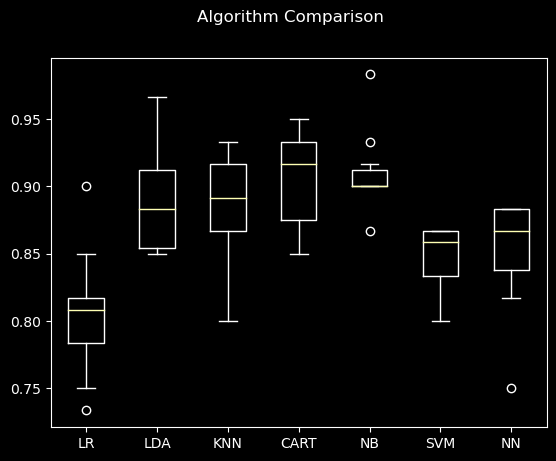

In [21]:
figure = plt.figure()
figure.suptitle('Algorithm Comparison')
axis = figure.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()


#### A. To Create the Logistic Regression Model 

In [59]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(max_iter=100000, random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

# show the comparison between the actual and predicted values
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict_LogReg}).head(20)

,Actual,Predicted
0,10,10
1,1,1
2,3,0
3,10,10
4,3,3
5,9,6
6,10,10
7,8,8
8,10,10
9,0,0


###### To Evaluate the Performance of the Logistic Regression Model

Text(95.72222222222221, 0.5, 'Actual Value')

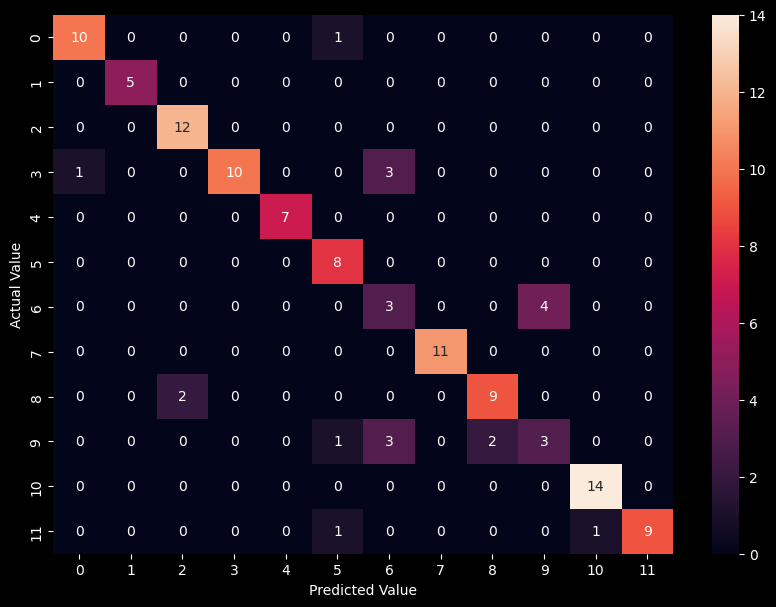

In [23]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [24]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8417



In [25]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      1.00      1.00         5
           2       0.86      1.00      0.92        12
           3       1.00      0.71      0.83        14
           4       1.00      1.00      1.00         7
           5       0.73      1.00      0.84         8
           6       0.33      0.43      0.38         7
           7       1.00      1.00      1.00        11
           8       0.82      0.82      0.82        11
           9       0.43      0.33      0.38         9
          10       0.93      1.00      0.97        14
          11       1.00      0.82      0.90        11

    accuracy                           0.84       120
   macro avg       0.83      0.84      0.83       120
weighted avg       0.85      0.84      0.84       120



#### Applying GridSearchCV to find the Best Parameters for the Logistic Regression Model

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.

In [26]:
# To Import the StratifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=100000, random_state=0),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}],
             scoring='accuracy')


c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit


In [27]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.083333,1.387779e-17,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.083333,1.387779e-17,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}"
2,0.083333,1.387779e-17,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin..."
3,0.086667,6.666667e-03,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}"
4,0.408333,4.031129e-02,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
...,...,...,...
65,NaN,NaN,"{'C': 1000, 'penalty': 'l1', 'solver': 'sag'}"
66,0.941667,2.713137e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton..."
67,0.941667,2.713137e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}"
68,0.931667,2.034426e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}"


In [28]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9416666666666667

BEST PARAMETERS:
{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


#### Applying RandomizedSearchCV to find the Best Parameters for the Logistic Regression Model

By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search.

In [29]:
# To Import the StratifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the RandomizedSearchCV Class
from sklearn.model_selection import RandomizedSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}]

#C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#penalty = ['l1', 'l2']
#solver = ['newton-cg', 'lbfgs', 'saga', 'sag']
#parameters = dict(C=C, penalty=penalty, solver=solver)

randomized_search = RandomizedSearchCV(estimator = logistic_regression,
                                       param_distributions = parameters,
                                       n_iter = 50,
                                       scoring = 'accuracy',
                                       cv = k_Fold,
                                       n_jobs = -1,
                                       random_state = 0)
best_fit = randomized_search.fit(X, Y)
print(randomized_search)

c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=LogisticRegression(max_iter=100000,
                                                random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'penalty': ['l1'],
                                         'solver': ['liblinear', 'saga']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'saga', 'sag']}],
                   random_state=0, scoring='accuracy')


In [30]:
# To View the Results of the GridSearch
pd.DataFrame(randomized_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.490000,3.958114e-02,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': ..."
1,0.490000,3.958114e-02,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}"
2,0.913333,3.480102e-02,"{'solver': 'saga', 'penalty': 'l1', 'C': 10}"
3,NaN,NaN,"{'solver': 'newton-cg', 'penalty': 'l1', 'C': ..."
4,NaN,NaN,"{'solver': 'newton-cg', 'penalty': 'l1', 'C': ..."
5,0.883333,3.162278e-02,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}"
6,0.870000,2.962731e-02,"{'solver': 'saga', 'penalty': 'l1', 'C': 1}"
7,0.918333,2.833333e-02,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}"
8,0.616667,4.533824e-02,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': ..."
9,0.936667,2.081666e-02,"{'solver': 'sag', 'penalty': 'l2', 'C': 1000}"


In [31]:
# To Identify the Best Accuracy and Best Features

best_accuracy = randomized_search.best_score_
best_parameters = randomized_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9416666666666667

BEST PARAMETERS:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000}


###### To Create New Logistic Regression Model Using the Optimal Parameters

In [32]:
# To Instantiate the Model (Using the Optimized Parameters)
logistic_regression = LogisticRegression(C=1000, penalty='l2', solver='newton-cg', random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

array([10,  1,  3, 10,  3,  9, 10,  8, 10,  0,  4, 11,  0,  4,  8, 10,  5,
        9,  0,  2,  8, 10,  2,  0, 10,  0,  4,  5, 10,  7,  2,  5,  2,  3,
        1,  7,  6,  2,  0,  3,  2,  4,  4,  0,  9,  8,  2,  3, 11,  2,  3,
        3,  1,  6,  6, 11,  7,  0,  8,  5,  5,  8,  7,  2,  9, 10,  9,  9,
       11,  5,  9,  0,  5, 10,  8,  6,  2,  7,  8,  7, 11,  5,  3,  8,  3,
        8,  5,  9,  9,  1, 11,  7,  9,  3, 11,  4, 10,  3,  9,  8,  3,  7,
       11,  7,  8,  3, 10, 11,  7,  6,  2, 11,  2,  0,  7,  1, 11, 10,  4,
       10])

###### To Evaluate the Performance of the Logistic Regression Model

Text(95.72222222222221, 0.5, 'Actual Value')

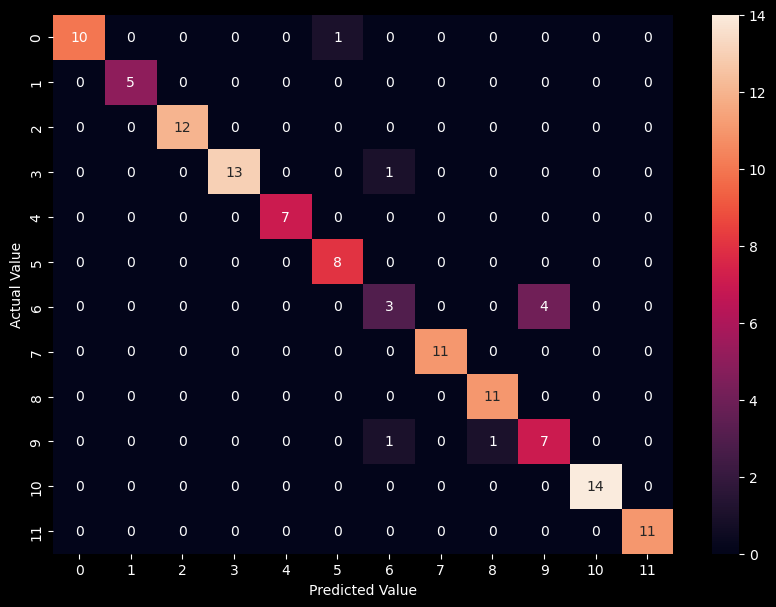

In [33]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [34]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9333



In [35]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        12
           3       1.00      0.93      0.96        14
           4       1.00      1.00      1.00         7
           5       0.89      1.00      0.94         8
           6       0.60      0.43      0.50         7
           7       1.00      1.00      1.00        11
           8       0.92      1.00      0.96        11
           9       0.64      0.78      0.70         9
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        11

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



#### B. To Create the K-Nearest Neighbors Model 

In [36]:
# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier()

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN


array([10,  1,  6, 10,  3,  3, 10,  8, 10,  0,  4, 11,  0,  4,  8, 10,  5,
        9,  0,  2,  8, 10,  2,  0, 10,  0,  4,  5, 10,  7,  2,  5,  2,  3,
        1,  7,  6,  2,  0,  6,  2,  4,  4,  0,  9,  8,  2,  3, 11,  2,  3,
        3,  1,  6,  6, 11,  7,  0,  8,  5,  5,  8,  7,  2,  9, 10,  9,  6,
       11,  5,  9,  0,  5, 10,  8,  6,  8,  7,  8,  7, 11,  5,  3,  8,  3,
        8,  5,  9,  9,  1, 11,  7,  6,  3,  5,  4, 10,  3,  6,  8,  3,  7,
       11,  7,  8,  3, 10, 11,  7,  6,  2, 11,  2,  0,  7,  1, 11, 10,  4,
       10])

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

Text(95.72222222222221, 0.5, 'Actual Value')

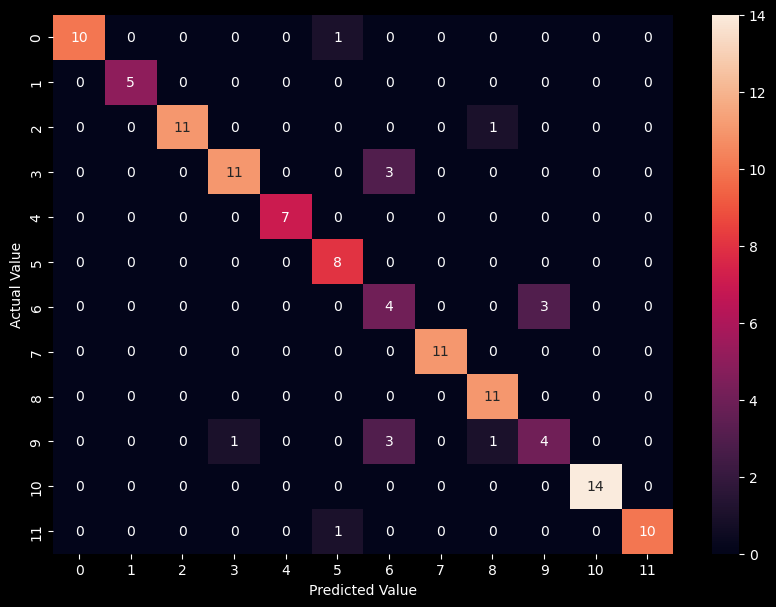

In [37]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [38]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8833



In [39]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         5
           2       1.00      0.92      0.96        12
           3       0.92      0.79      0.85        14
           4       1.00      1.00      1.00         7
           5       0.80      1.00      0.89         8
           6       0.40      0.57      0.47         7
           7       1.00      1.00      1.00        11
           8       0.85      1.00      0.92        11
           9       0.57      0.44      0.50         9
          10       1.00      1.00      1.00        14
          11       1.00      0.91      0.95        11

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.90      0.88      0.89       120



#### Applying GridSearch to find the Best Parameters for the K-Nearest Neighbors Machine Model

In [40]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the K Nearest Neighbors Model
k_range = list(range(1, 51))
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50, 60, 70, 80, 100]
parameters = dict(n_neighbors=k_range, weights=weight, algorithm=algorithm, leaf_size=leaf_size)
grid_search = GridSearchCV(estimator = k_nearest_neighbors,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


In [41]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.900000,0.023570,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
1,0.900000,0.023570,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
2,0.876667,0.031798,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
3,0.900000,0.023570,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
4,0.900000,0.047726,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
...,...,...,...
3595,0.883333,0.018257,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3596,0.870000,0.016330,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3597,0.883333,0.018257,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3598,0.871667,0.018333,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."


In [42]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9099999999999999

BEST PARAMETERS:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


###### To Create New K-Nearest Neighbors Model Using the Optimal Parameters

In [43]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', leaf_size=10)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

array([10,  1,  3, 10,  3,  3, 10,  8, 10,  0,  4, 11,  0,  4,  8, 10,  5,
        9,  0,  2,  8, 10,  2,  0, 10,  0,  4,  5, 10,  7,  2,  5,  2,  3,
        1,  7,  6,  2,  0,  3,  2,  4,  4,  0,  9,  8,  2,  3, 11,  2,  3,
        3,  1,  6,  6, 11,  7,  0,  8,  5,  5,  8,  7,  2,  9, 10,  9,  6,
       11,  5,  9,  0,  5, 10,  8,  3,  8,  7,  8,  7, 11,  5,  3,  8,  3,
        8,  5,  9,  9,  1, 11,  7,  6,  3,  5,  4, 10,  3,  9,  8,  3,  7,
       11,  7,  8,  3, 10, 11,  7,  6,  2, 11,  2,  0,  7,  1, 11, 10,  4,
       10])

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

Text(95.72222222222221, 0.5, 'Actual Value')

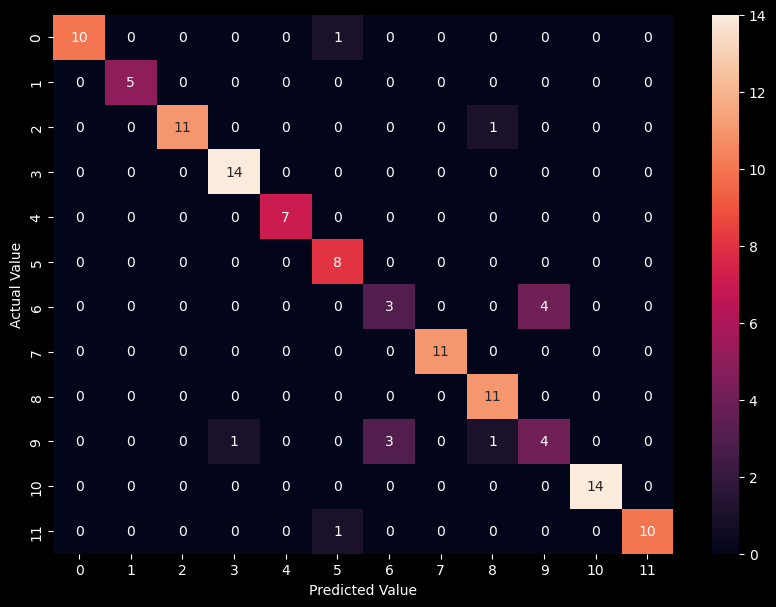

In [44]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [45]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9000



In [46]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         5
           2       1.00      0.92      0.96        12
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00         7
           5       0.80      1.00      0.89         8
           6       0.50      0.43      0.46         7
           7       1.00      1.00      1.00        11
           8       0.85      1.00      0.92        11
           9       0.50      0.44      0.47         9
          10       1.00      1.00      1.00        14
          11       1.00      0.91      0.95        11

    accuracy                           0.90       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.90      0.90      0.90       120



#### C. To Create the Support Vector Machine Model 

In [47]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

array([10,  1,  6, 10,  6,  6, 10,  8, 10,  0,  4,  5,  0,  4,  8, 10,  5,
        6,  0,  2,  8, 10,  2,  0, 10,  0,  4,  5, 10,  7,  2,  5,  8,  6,
        1,  7,  6,  2,  0,  6,  2,  4,  4,  0,  6,  8,  2,  6,  5,  2,  6,
        6,  1,  6,  6,  5,  7,  0,  8,  5,  5,  8,  7,  2,  6, 10,  6,  6,
        5,  5,  6,  0,  5, 10,  8,  6,  8,  7,  8,  7,  5,  5,  6,  8,  6,
        8,  5,  6,  6,  1,  5,  7,  6,  6,  5,  4, 10,  6,  6,  8,  6,  7,
        5,  7,  8,  6, 10,  5,  7,  6,  2, 11,  2,  0,  7,  1, 11, 10,  4,
       10])

###### To Evaluate the Performance of the Support Vector Machine Model

Text(95.72222222222221, 0.5, 'Actual Value')

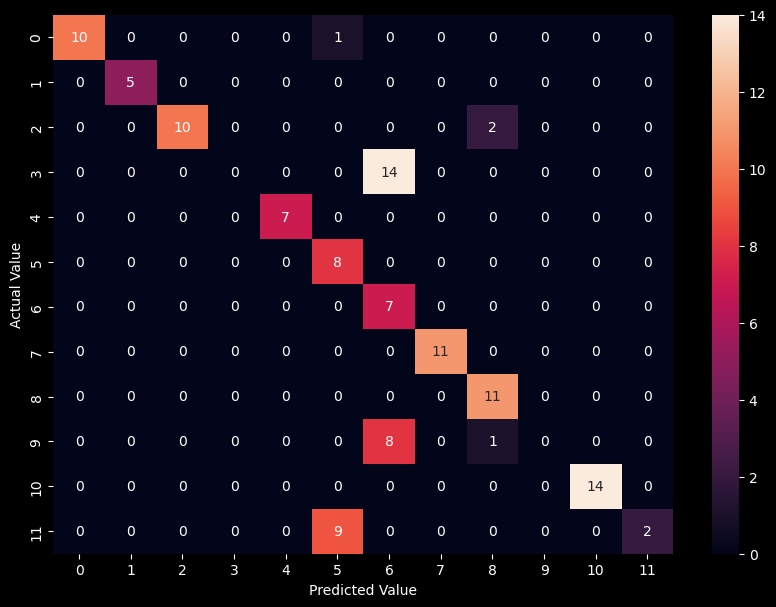

In [48]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [49]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.7083



In [50]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         5
           2       1.00      0.83      0.91        12
           3       0.00      0.00      0.00        14
           4       1.00      1.00      1.00         7
           5       0.44      1.00      0.62         8
           6       0.24      1.00      0.39         7
           7       1.00      1.00      1.00        11
           8       0.79      1.00      0.88        11
           9       0.00      0.00      0.00         9
          10       1.00      1.00      1.00        14
          11       1.00      0.18      0.31        11

    accuracy                           0.71       120
   macro avg       0.71      0.74      0.67       120
weighted avg       0.71      0.71      0.66       120



c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RenzCute\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Applying GridSearch to find the Best Parameters for the Support Vector Machine Model

In [51]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Support Vector Machine Model
parameters = [{'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['linear'], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.5, 1, 5, 10], 'degree': [2, 3, 4, 5], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.5, 1, 5, 10]}]
grid_search = GridSearchCV(estimator = support_vector_machine,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4, 5], 'gamma': [0.1, 0.5, 1, 5, 10],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'gamma': [0.1, 0.5, 1, 5, 10],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')


In [52]:
# Other Parameters for SVM
# To Set Parameters to be Optimized Under the Support Vector Machine Model
#parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'decision_function_shape' : ['ovo', 'ovr']},
              #{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']},
              #{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 5, 10], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'decision_function_shape' : ['ovo', 'ovr']},
              #{'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']}]

In [53]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.836667,2.666667e-02,"{'C': 0.001, 'decision_function_shape': 'ovo',..."
1,0.836667,2.666667e-02,"{'C': 0.001, 'decision_function_shape': 'ovr',..."
2,0.840000,2.905933e-02,"{'C': 0.01, 'decision_function_shape': 'ovo', ..."
3,0.840000,2.905933e-02,"{'C': 0.01, 'decision_function_shape': 'ovr', ..."
4,0.841667,3.270236e-02,"{'C': 0.1, 'decision_function_shape': 'ovo', '..."
...,...,...,...
337,0.506667,5.280993e-02,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}"
338,0.000000,0.000000e+00,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid'}"
339,0.000000,0.000000e+00,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}"
340,0.083333,1.387779e-17,"{'C': 1000, 'gamma': 5, 'kernel': 'sigmoid'}"


In [54]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9516666666666665

BEST PARAMETERS:
{'C': 0.001, 'decision_function_shape': 'ovo', 'degree': 4, 'gamma': 10, 'kernel': 'poly'}


###### To Create New Support Vector Machine Model Using the Optimized Parameters

In [55]:
# To Instantiate the Model (Using the Optimized Parameters)
state_vector_machine = SVC(C=0.001, decision_function_shape='ovo', gamma=10, kernel='poly', degree=4, random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
state_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_SVM = state_vector_machine.predict(X_test)
Y_predict_SVM


array([10,  1,  3, 10,  3,  9, 10,  8, 10,  0,  4, 11,  0,  4,  8, 10,  5,
        9,  0,  2,  8, 10,  2,  0, 10,  0,  4,  5, 10,  7,  2,  5,  2,  3,
        1,  7,  6,  2,  0,  3,  2,  4,  4,  0,  9,  8,  2,  3, 11,  2,  3,
        3,  1,  6,  6, 11,  7,  0,  8,  5,  5,  8,  7,  2,  9, 10,  9,  9,
       11,  5,  9,  0,  5, 10,  8,  3,  2,  7,  8,  7, 11,  5,  3,  8,  3,
        8,  5,  9,  9,  1, 11,  7,  9,  3,  5,  4, 10,  3,  9,  8,  3,  7,
       11,  7,  8,  3, 10, 11,  7,  6,  2, 11,  2,  0,  7,  1, 11, 10,  4,
        7])

Text(95.72222222222221, 0.5, 'Actual Value')

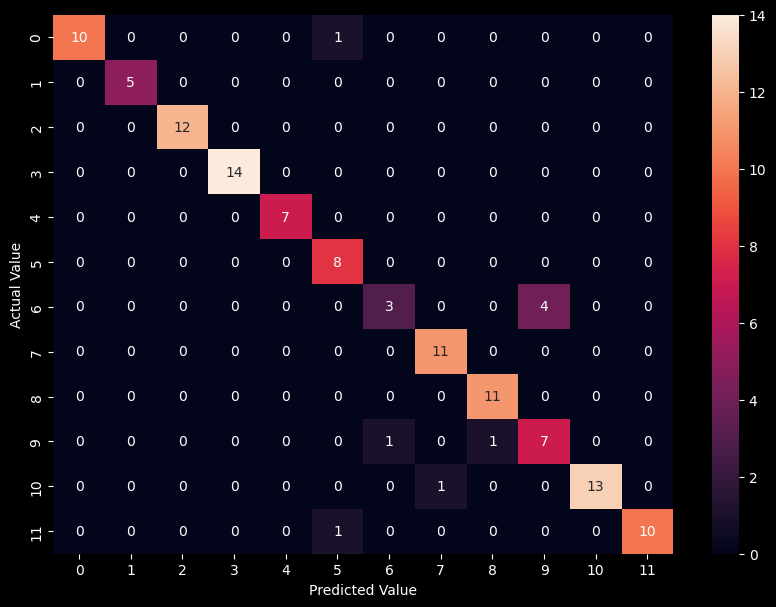

In [56]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [57]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9250



In [58]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         7
           5       0.80      1.00      0.89         8
           6       0.75      0.43      0.55         7
           7       0.92      1.00      0.96        11
           8       0.92      1.00      0.96        11
           9       0.64      0.78      0.70         9
          10       1.00      0.93      0.96        14
          11       1.00      0.91      0.95        11

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.93      0.93      0.92       120



###### Dr. Robert G. de Luna, PECE
robert.deluna@dlsl.edu.ph / robert_g_deluna@dlsu.edu.ph